In [1]:
from datasets import load_dataset

dataset = load_dataset("llm-book/livedoor-news-corpus")

In [2]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 5893
    })
    validation: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 736
    })
    test: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 738
    })
})


In [3]:
from pprint import pprint

pprint(dataset['train'][0])

{'category': 'livedoor-homme',
 'content': '日常の何気ない気持ちをTwitterにつぶやいたり、実名登録のFacebookで懐かしい友人と再会したり、SNSはもはや我々の生活において欠かせない存在となりつつある。先日、国内の月間利用者数が1,000万人を突破し、mixi（1,520万人、2011年12月現在）を追い抜くのも時間の問題と思われるFacebookでは、診断やゲームなど様々なアプリが生まれ、ユーザーのタイムラインを今日も賑わしている。しかし、その一方で、Facebookを悪用するケースもまた徐々に増え始めている。  '
            'Facebookでは、2008年1月にAPIが公開されて以来、様々なアプリが誕生しているが、同年8月にはボット型の不正プログラム「KOOBFACE」が確認され、感染を広げた。その手口とは、「あなたがビデオに出ていますよ！」というメッセージが届き、YouTubeに偽装したURLにアクセスすると、動画再生のためにプログラムのインストールを求められ、不正プログラムをダウンロードさせるというもの。  '
            '不正プログラムには、画面に偽の感染警告を表示し、駆除のための偽セキュリティソフトを購入させ、クレジットカード情報などの個人情報を盗むものや、ブラウザでログイン時のアカウント情報を盗むものなどが存在。更に、そのユーザーのFacebookフレンド宛にも不正なメッセージを自動送信することによって、感染規模を拡大していくのだ。  '
            '2010年12月にはFacebookの公式アカウントを騙り、不正プログラムをインストールさせようとするスパムメールや、2011年1月にはアカウントの更新に必要として、個人情報を盗むフィッシングサイトを確認。その他にも、可愛らしい女性のプロフィール画像を載せた人物から好意的なメッセージが届き、携帯アドレスへの連絡を求めるスパムメッセージなど、その手口は年々多様化している。  '
            'Facebookのみならず、今年1月にはTwitter公式アカウントを騙るフィッシング詐欺サイトも確認され、昨年12月の警察庁による発表では、SNS以外にもフィッシング詐欺で約2,000万円、不正プログラムで

In [4]:
from collections import Counter

pprint(Counter(dataset["train"]["category"]).most_common())

[('sports-watch', 731),
 ('it-life-hack', 718),
 ('dokujo-tsushin', 695),
 ('smax', 690),
 ('movie-enter', 689),
 ('peachy', 677),
 ('kaden-channel', 656),
 ('topic-news', 616),
 ('livedoor-homme', 421)]


In [5]:
categories = set()
for data in dataset["train"]:
    category, title = data["category"], data["title"]
    if category not in categories:
        categories.add(category)
        print(f"{category}: {title}")

livedoor-homme: 急成長を遂げるFacebookに忍び寄る影
it-life-hack: いつでもどこでも自分専用環境！　Ubuntu起動ができるUSBメモリーを作成！【デジ通】
kaden-channel: 「PS Vita」がついに発売　—　初日は待ちわびたファンが行列を作る大盛況【話題】
smax: ソニーモバイル、Xperia ionのLTE非対応版「Xperia ion HSPA」を発表
peachy: 【終了しました】リムジンでお買い物の後はスイートルームで“うっとろりん”、お姫さまのような1日をプレゼント
movie-enter: 有言実行の男、ジュード・ロウが自信作を引っ提げ来日決定
dokujo-tsushin: 言いにくい「芸能人の○○みたいにして」の一言
sports-watch: 日本代表敗戦、セルジオ越後氏は「ベストメンバーでなければこの程度」
topic-news: 「柏木はブタ鼻」嫉妬ややっかみからAKB48で流行るイジメごっこ


100%|█████████████████████████████████████| 5893/5893 [00:05<00:00, 1145.20it/s]


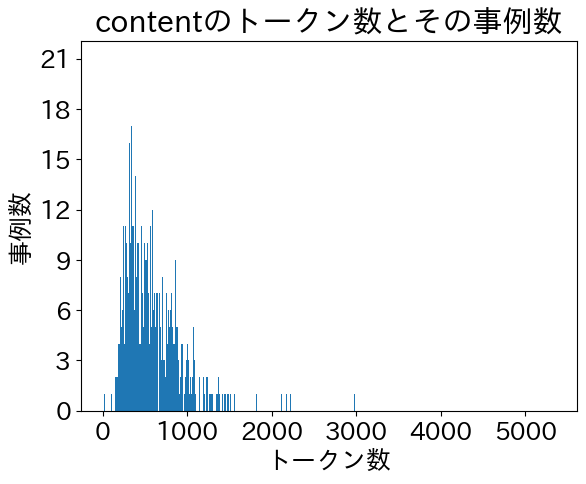

100%|████████████████████████████████████| 5893/5893 [00:00<00:00, 15604.77it/s]


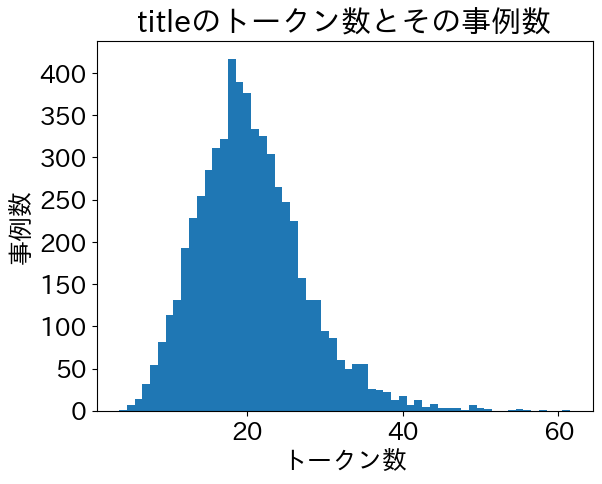

In [9]:
from collections import Counter
import japanize_matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from tqdm import tqdm
from transformers import AutoTokenizer, PreTrainedTokenizer

plt.rcParams["font.size"] = 18

def visualize_num_tokens_distribution(
    dataset: Dataset, tokenizer: PreTrainedTokenizer, column: str) -> None:
    counter = Counter()
    for data in tqdm(dataset):
        num_tokens = len(tokenizer.tokenize(data[column]))
        counter[num_tokens] += 1
        
    plt.bar(counter.keys(), counter.values(), width=1.0)
    plt.xlabel("トークン数")
    plt.ylabel("事例数")
    plt.title(f"{column}のトークン数とその事例数")
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter("%d"))
    plt.show()
    
model_name = "retrieva-jp/t5-base-long"
tokenizer = AutoTokenizer.from_pretrained(model_name)
visualize_num_tokens_distribution(dataset["train"], tokenizer, "content")
visualize_num_tokens_distribution(dataset["train"], tokenizer, "title")

In [11]:
!pip install mecab-python3 rouge-score sacrebleu bert_score

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached mecab_python3-1.0.6-cp310-cp310-macosx_11_0_arm64.whl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 867.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 826.8 kB/s eta 0:00:00 0:00:01
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.5 MB/s eta 0:00:0000:0100:010m
  Installing build dependencies ... done
  Getting requiremen